
# Matplotlib and Seaborn

> ### Data-X: Applied Data Ventures | University of California, Berkeley | Fall 2020
> ### Author: Joshua Rafael Sanchez, B.S. IEOR '20
> In collaboration with Elias Castro Hernandez, Ikalaq Sidhu.
> Email: joshuarafael@berkeley.edu

> #### About This Notebook:
This notebook is content which aims to introduce the **Matplotlib and Seaborn** Libraries.  All material was used in the introductory video.  This content should be relatively short and straightforward. 
<br>
For each of these libraries, 4 common visualizations across each library are included: __a scatter plot, horiziontal bar chart, column histograms and a line plot.__   You can access the content through the [Table of Contents](#table_of_contents) below.  
> #### Main References:
- This notebook by Alexander Fred Ojala and Elias Castro Hernandez: [visualization-intro-w-matplotlib-seaborn-plotly-v3](<https://github.com/ikhlaqsidhu/data-x/blob/master/02c-tools-data-visualizations_ech/visualization-intro-w-matplotlib-to-K3D_ech.ipynb>)
    - Stanfords's CS 448B - Data Visualization Techniques Class (see Appendix I), Code Academy Tutorials (Seaborn), and the works of Edward Tufte.
- If you would like to understand more of these concepts in depth, here is a **master list** of resources to compile this module: [Data Visualization - Resources](<https://docs.google.com/document/d/1ShLBukv2lFPYJ8pU009BQ2lr0JXy8CazLfEceB71BWg/edit?usp=sharing>) 

> #### Copyright: 
Feel free to do whatever do want with this code.

___

<a id='table_of_contents'></a>
## Table of Contents

### [0. Setup](#part_0)
> Here, we will do three things: 
- 1) [Introduce what set we are analyzing.](#0.0)
- 2) [Import packages and datasets.](#0.1)
- 3) [Explain datasets we would like to analyze.](#0.2)

### [1. Matplotlib](#part_1)
> Firstly, we will implement all of the proposed data visualizations in Matplotlib. We will start with Matplotlib as it is argurably the most widespread used among data visualization libraries in Python.  _This part is done using non-Pythonic code._ Examples:
- 1A.) [Scatter plot](#1a)
- 1B.) [Horizontal bar chart](#1b)
- 1C.) [Column histograms](#1c)
- 1D.) [Line plot](#1d)

### [2. Seaborn](#part_2)
> Again, we will implement all of the proposed data visualizations but in Seaborn instead.  You will see that Seaborn includes features that amplify the qualities that Matplotlib has to offer. _The part is done using Pythonic code._ Examples:
- 2A.) [Scatter plot](#2a)
- 2B.) [Horiziontal bar chart](#2b)
- 2C.) [Column histograms](#2c)
- 2D.) [Line plot](#2d)

___

<a id='part_0'></a>
## 0. Setup
[Back to the table of contents.](#table_of_contents)

<a id='0.0'></a>
#### About the Dataset: 
> The dataset that I wanted to use for this visualization had to incorporate different variables, categories, and sometimes over a period of time.  Airbnb has a site where they make datasets about their listings publicly available.  Check out the site I obtained the data: http://insideairbnb.com/get-the-data.html  
> For this notebook, I used the `listings.csv`, `calendar.csv` & `reviews.csv` datasets.  The Country/City displayed is San Francisco, and the data compiled is 08 June, 2020.

<a id='0.1'></a>
#### Importing the Packages & Datasets: 
> Usually, we import Pandas and Numpy packages first:

In [1]:
# import packages
import pandas as pd # make the Pandas Dataframe
import numpy as np

> Then, we import the following datasets into Pandas DataFrames. Shows all the listings as rows posted on 08 June 2020.  Each column (Previews of the first 5 rows of each are below.)  
- 1) `df`: Data from the `listing.csv` file.   
- 2) `df_2`: Data from the `calendar.csv` file.
- 2) `df_3`: Data from the `review.csv` file.

In [2]:
# import dataset into dataframe 
df = pd.read_csv (r'listings_copy.csv') 
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,958,"Bright, Modern Garden Unit - 1BR/1BTH",1169,Holly,NaN,Western Addition,37.76931,-122.43386,Entire home/apt,170,1,241,2020-03-28,1.82,1,143
1,5858,Creative Sanctuary,8904,Philip And Tania,NaN,Bernal Heights,37.74511,-122.42102,Entire home/apt,235,30,111,2017-08-06,0.82,1,0
2,7918,A Friendly Room - UCSF/USF - San Francisco,21994,Aaron,NaN,Haight Ashbury,37.76555,-122.45213,Private room,65,32,19,2020-03-06,0.14,9,365
3,8142,Friendly Room Apt. Style -UCSF/USF - San Franc...,21994,Aaron,NaN,Haight Ashbury,37.76555,-122.45213,Private room,65,32,8,2018-09-12,0.11,9,365
4,8339,Historic Alamo Square Victorian,24215,Rosy,NaN,Western Addition,37.77525,-122.43637,Entire home/apt,726,5,28,2019-06-28,0.21,2,365


In [3]:
# import dataset into dataframe
# remove from .gz file.
df_2 = pd.read_csv('calendar.csv.gz', compression='gzip', header=0, sep=',', quotechar='"', error_bad_lines=False)
df_2.head(5)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,40138,2020-06-08,f,$67.00,$67.00,30,1125
1,128230,2020-06-08,f,$350.00,$350.00,3,15
2,40138,2020-06-09,f,$67.00,$67.00,30,1125
3,40138,2020-06-10,f,$67.00,$67.00,30,1125
4,40138,2020-06-11,f,$67.00,$67.00,30,1125


In [4]:
# import dataset into dataframe
# remove from .gz file.
df_3 = pd.read_csv('reviews.csv.gz', compression='gzip', header=0, sep=',', quotechar='"', error_bad_lines=False)
df_3.head(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,958,5977,2009-07-23,15695,Edmund C,"Our experience was, without a doubt, a five st..."
1,958,6660,2009-08-03,26145,Simon,Returning to San Francisco is a rejuvenating t...
2,958,11519,2009-09-27,25839,Denis,We were very pleased with the accommodations a...
3,958,16282,2009-11-05,33750,Anna,We highly recommend this accomodation and agre...
4,958,26008,2010-02-13,15416,Venetia,Holly's place was great. It was exactly what I...


<a id='0.2'></a>
> Finally, I manipulated the dataset for the purpose of creating the four visualizations for each library.
- 1) Dataset for __scatter plot__: 
    - `df_a`: The reviews/month of a post & the number of listings total (regardless of location) under that host, averaged across all listings for specific neighborhood.  (The host is the person who posts the listing.  We are analyzing how involved the average host on Airbnb is for a particular neighbourhood.) 
- 2) Datasets for __horizontal bar chart__: 
    - `df_b`: The number of total listings under that neighbourhood.
    - `db_b_1`: The number of total listings under that neighbourhood under `room_type` __'Entire home/apt'__
- 3) Datasets for __histograms__: 
    - `df_c_1`: Distribution of listings under particular price ranges under under `room_type` __'Entire home/apt'__
    - `df_c_2`: Distribution of listings under particular price ranges under under `room_type` __'Hotel room'__
    - `df_c_3`: Distribution of listings under particular price ranges under under `room_type` __'Private room'__
    - `df_c_4`: Distribution of listings under particular price ranges under under `room_type` __'Shared room'__
- 4) Dataset for __line plot__: 
    - `df_d`: Comparison of average price of listing in San Francisco over time.

In [5]:
# creating df_a
df_a = df.groupby('neighbourhood').agg('mean').sort_values(by='price', ascending=False)[['reviews_per_month', 'calculated_host_listings_count']]
df_a.head()

,reviews_per_month,calculated_host_listings_count
neighbourhood,,
Presidio Heights,1.012609,11.827586
Nob Hill,0.816859,34.273292
North Beach,1.332482,21.225225
Marina,1.072946,16.690476
Pacific Heights,1.247770,10.703488


In [6]:
# creating df_b and df_b_1 (just 'Entire home/apt' room type)
df_b = df.groupby('neighbourhood').agg('count')['id'].sort_values(ascending=False)
df_b_1 =  df[df['room_type'] == 'Entire home/apt'].groupby('neighbourhood').agg('count')['id'].sort_values(ascending=False)
df_b_1.head()

neighbourhood
Mission                  433
South of Market          429
Western Addition         340
Castro/Upper Market      291
Downtown/Civic Center    290
Name: id, dtype: int64

In [7]:
# creating df_c (4 datasets)
df_c_types = df.groupby('room_type').agg('count').index
df_c_1 = df[df['room_type'] == df_c_types[0]]['price'].sort_values(ascending=False)
df_c_2 = df[df['room_type'] == df_c_types[1]]['price'].sort_values(ascending=False)
df_c_3 = df[df['room_type'] == df_c_types[2]]['price'].sort_values(ascending=False)
df_c_4 = df[df['room_type'] == df_c_types[3]]['price'].sort_values(ascending=False)
df_c_4.head(5)

503     10000
4809     1200
5908      999
4817      555
4005      200
Name: price, dtype: int64

In [8]:
# creating df_d
df_d_to_append = df_2[['price']].replace('[\$,]', '', regex=True).astype(float)
df_d_other = df_2[['date']]
df_d = df_d_other.join(df_d_to_append).groupby('date').agg(np.mean)
df_d.head(5)

,price
date,
2020-06-08,245.444971
2020-06-09,245.902995
2020-06-10,246.026875
2020-06-11,246.233427
2020-06-12,250.322882


____

<a id='part_1'></a>
## 1. Matplotlib
[Back to Table of Contents](#table_of_contents)

<a id='1a'></a>
#### 1A. Scatter Plot (Example of data which visualizes relationships.)

> Each point represents the data of a specific neighbourhood of San Francisco.  

> __Tip:__ If you would like to access the code documentation of a certain function, say `plt.scatter()` for example, try adding a `?` in front of the function. In this case, try running `?plt.scatter()` to get a better understanding for the function.

In [9]:
# importing matplotlib
import matplotlib.pyplot as plt

In [10]:
# OPTIONAL: Try running this cell! You should be able to access the documentation associated with the function.
?plt.scatter()

In [11]:
# OPTIONAL: for your reference, how df_a looks like (snippet of 3 rows):
df_a.head(3)

,reviews_per_month,calculated_host_listings_count
neighbourhood,,
Presidio Heights,1.012609,11.827586
Nob Hill,0.816859,34.273292
North Beach,1.332482,21.225225


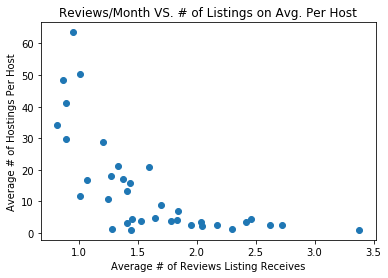

In [12]:
# run this cell to create scatter plot
plt.scatter(df_a['reviews_per_month'], df_a['calculated_host_listings_count']) # load in columns of dataframe
plt.xlabel('Average # of Reviews Listing Receives')
plt.ylabel('Average # of Hostings Per Host')
plt.title('Reviews/Month VS. # of Listings on Avg. Per Host')
plt.show()

<a id='1b'></a>
#### 1B. Horizontal Bar Chart (Example of chart showing the composition of data.)
> This is a horizontal bar chart showing the total number of Airbnb entries for a neighbourhood in San Francisco.

> __Tip:__ Further explaination/code of how to create a horizontal barplot: https://python-graph-gallery.com/2-horizontal-barplot/

In [13]:
# OPTIONAL: Try running this cell! You should be able to access the documentation associated with the function.
?plt.barh()

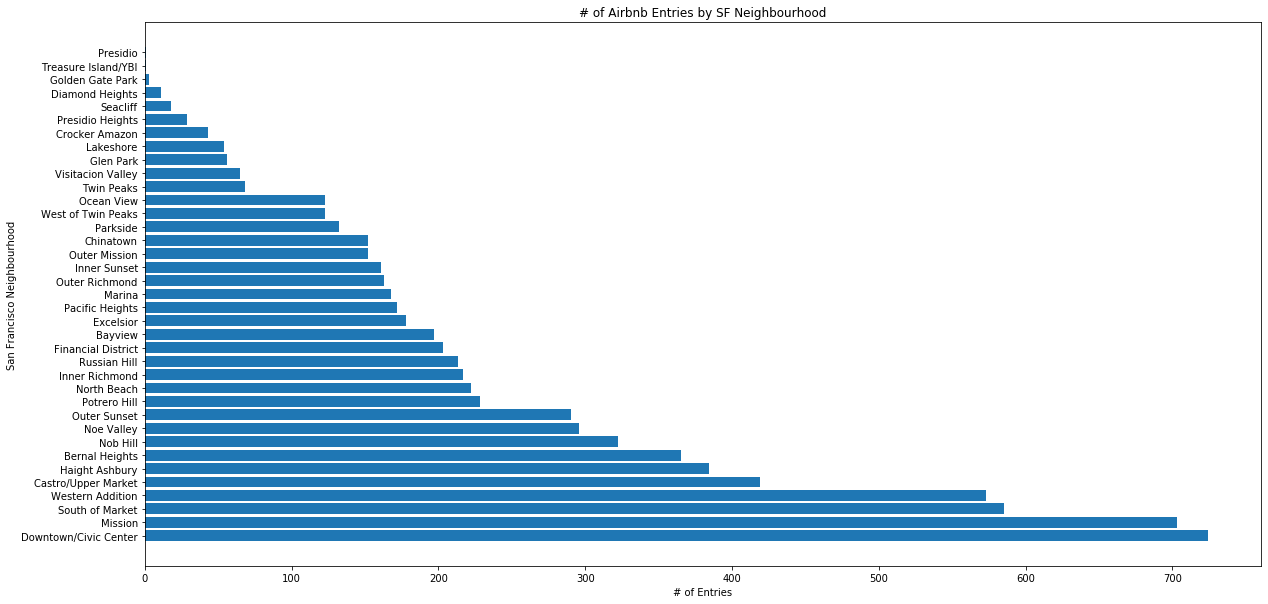

In [14]:
# run this cell to create horizontal bar chart
# step 1: define your numbers (data pre-processing)
y_pos = np.arange(len(df_b))
bars = df_b.index
height = df_b
# step 2: plot in this order
plt.figure(figsize=(20,10)) # make figure the right shape
plt.barh(y_pos, height)
plt.yticks(y_pos, bars)
plt.xlabel('# of Entries')
plt.ylabel('San Francisco Neighbourhood')
plt.title('# of Airbnb Entries by SF Neighbourhood')
plt.show()

<a id='1c'></a>
#### 1C. Column Histogram (Example of showing the quantitative distribution of data.)
> These 4 histograms below each show the distribution of listings by price.  Each histogram shows the distribution of a specific `room_type`. 

> __Note:__ The reason why these histograms are separate and not laid on top of each other is because the resulting overlaid plot isn't very helpful visually.

In [15]:
# OPTIONAL: Try running this cell! You should be able to access the documentation associated with the function.
?plt.hist()

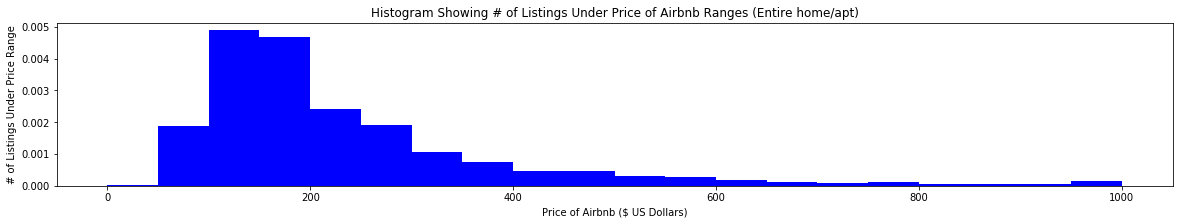

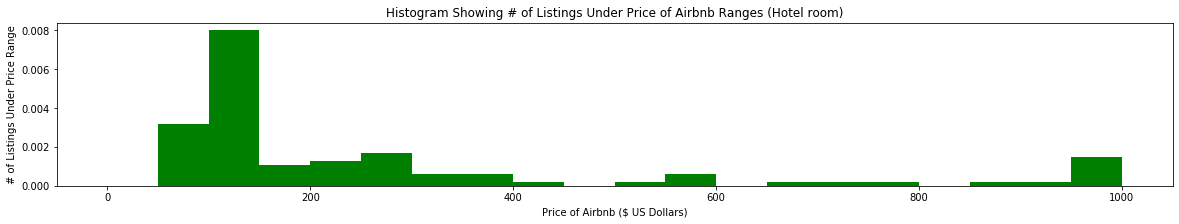

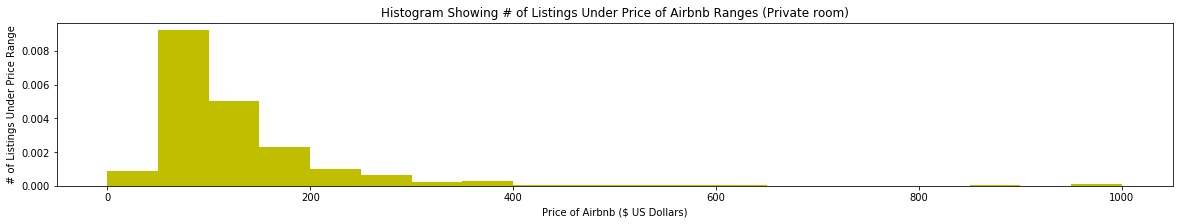

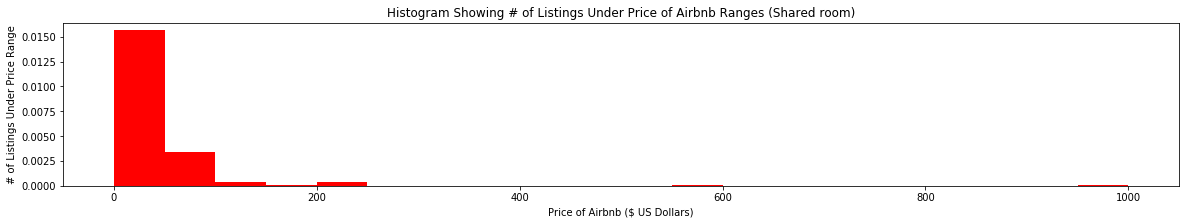

In [16]:
# run this cell to generate histogram 
# must do data cleaning before modeling (some points ommitted, but not important for purposes of demonstration)
plt.figure(figsize=(20, 3))
plt.hist(df_c_1, bins = np.arange(0,1001,50), density = True, color = 'b')
plt.xlabel('Price of Airbnb ($ US Dollars)')
plt.ylabel('# of Listings Under Price Range')
plt.title('Histogram Showing # of Listings Under Price of Airbnb Ranges (Entire home/apt)')
plt.show()

plt.figure(figsize=(20, 3))
plt.hist(df_c_2, bins = np.arange(0,1001,50), density = True, color = 'g')
plt.xlabel('Price of Airbnb ($ US Dollars)')
plt.ylabel('# of Listings Under Price Range')
plt.title('Histogram Showing # of Listings Under Price of Airbnb Ranges (Hotel room)')
plt.show()

plt.figure(figsize=(20, 3))
plt.hist(df_c_3, bins = np.arange(0,1001,50), density = True, color = 'y')
plt.xlabel('Price of Airbnb ($ US Dollars)')
plt.ylabel('# of Listings Under Price Range')
plt.title('Histogram Showing # of Listings Under Price of Airbnb Ranges (Private room)')
plt.show()

plt.figure(figsize=(20, 3))
plt.hist(df_c_4, bins = np.arange(0,1001,50), density = True, color = 'r')
plt.xlabel('Price of Airbnb ($ US Dollars)')
plt.ylabel('# of Listings Under Price Range')
plt.title('Histogram Showing # of Listings Under Price of Airbnb Ranges (Shared room)')
plt.show()

<a id='1d'></a>
#### 1D. Line Plot (Example of comparing quantitative data over time.)
> This line plot shows a line plot of the average Airbnb listing price in San Francisco over time.

> __Note:__ Thess sources may be a starting point to help make dates for your plots look better. https://matplotlib.org/3.1.1/gallery/recipes/common_date_problems.html, https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/

In [17]:
# importing matplotlib.dates (will be helpful in showing the graph)
import matplotlib.dates as mdates

In [18]:
# setting up only specific dates to be shown:
# making array of dates for x-axis. 
strdates = ['2020-06-08', '2020-07-08', '2020-08-08', '2020-09-08', '2020-10-08',
           '2020-11-08', '2020-12-08', '2021-01-08', '2021-02-08', '2021-03-08',
           '2021-04-08', '2021-05-08', '2021-06-07']
df_d_edit = df_d.loc[strdates] # get only specific dates to show.
df_d_edit.head(5)

,price
date,
2020-06-08,245.444971
2020-07-08,250.235987
2020-08-08,262.496289
2020-09-08,250.963143
2020-10-08,255.992066


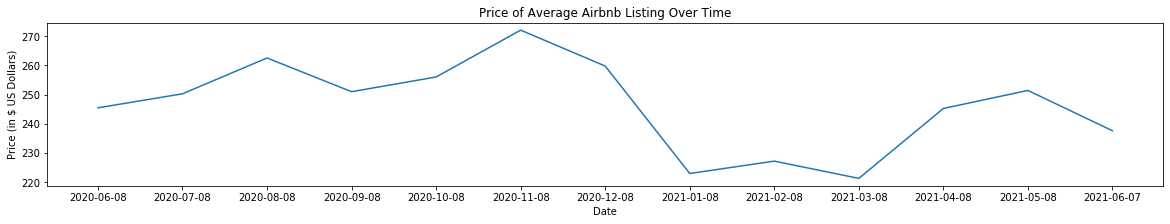

In [19]:
# run this cell to generate line plot
plt.figure(figsize=(20,3))
plt.plot(df_d_edit.index, df_d_edit['price'])
plt.xlabel('Date')
plt.ylabel('Price (in $ US Dollars)')
plt.title('Price of Average Airbnb Listing Over Time')
plt.show()

___

<a id='part_2'></a>
## 2. Seaborn
[Back to Table of Contents](#table_of_contents)

> Here, the four plots have the exact same data visualization; but instead, the following four are done in Seaborn rather than Matplotlib. 

> Some key differences to note when you are going through the second four data visualizations:
- The following four plots are done in a __Pythonic__ manner of conding.
- Seaborn has additional features which make the visualizations more aesthetically pleasing.

<a id='2a'></a>
#### 2A. Scatter Plot (Example of data which visualizes relationships.)

In [20]:
# import seaborn
import seaborn as sns

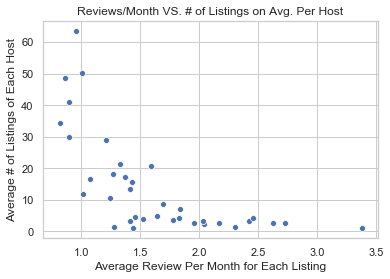

In [21]:
# create scatterplot
# reminder: this is done in Pythonic code (recommended way)
sns.set(style = 'whitegrid') # optional, there are different options
ax = sns.scatterplot(x = 'reviews_per_month', y = 'calculated_host_listings_count', data = df_a)
ax.set(xlabel = 'Average Review Per Month for Each Listing',
      ylabel = 'Average # of Listings of Each Host',
      title = 'Reviews/Month VS. # of Listings on Avg. Per Host')
plt.show()

<a id='2b'></a>
#### 2B. Horizontal Bar Chart (Example of chart showing the composition of data.)

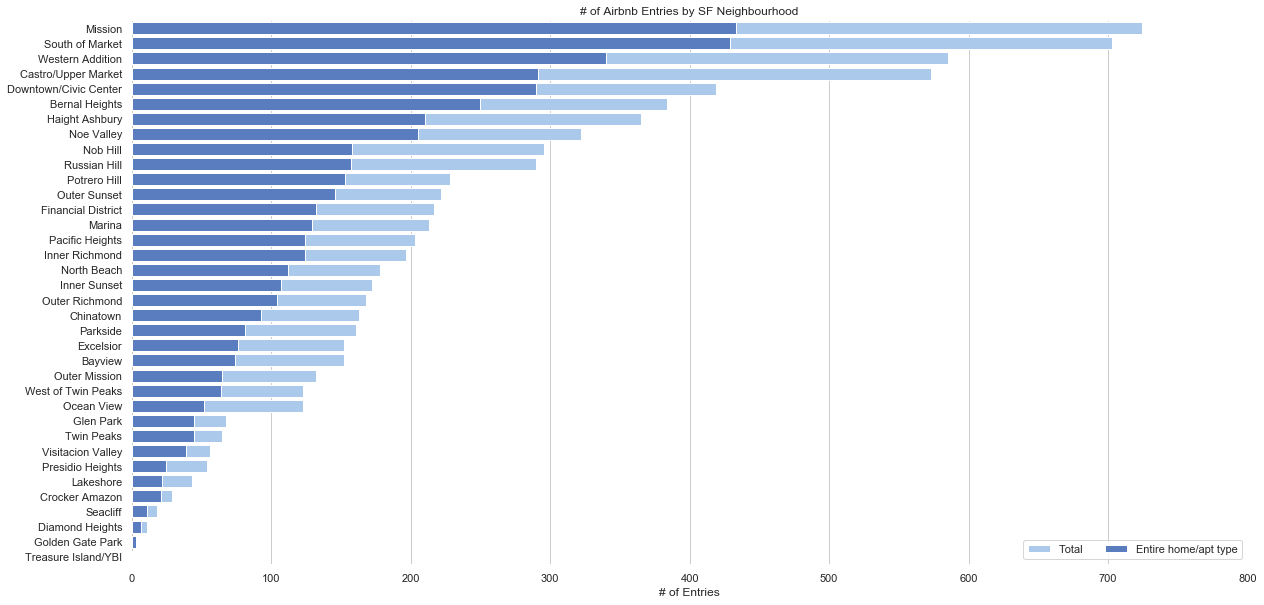

In [22]:
# run this cell to create bar chart
f, ax = plt.subplots(figsize=(20,10))
sns.set_color_codes("pastel")
sns.barplot(x=df_b.values, y=df_b.index,
            label="Total", color="b")

sns.set_color_codes("muted")
sns.barplot(x=df_b_1.values, y=df_b_1.index,
            label="Entire home/apt type", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 800), ylabel="",
       xlabel="# of Entries",
      title='# of Airbnb Entries by SF Neighbourhood')
sns.despine(left=True, bottom=True)

<a id='2c'></a>
#### 2C. Column Histogram (Example of showing the quantitative distribution of data.) 
> Further Explanation: https://seaborn.pydata.org/examples/horizontal_barplot.html, https://stackoverflow.com/questions/36362624/how-to-plot-multiple-histograms-on-same-plot-with-seaborn

In [ ]:
# run this cell to create multiple histograms
fig, ax = plt.subplots(figsize=(20,10))
for a in [df_c_1, df_c_2, df_c_3, df_c_4]:
    sns.distplot(a, bins=range(1, 1010, 10), ax=ax, kde=False)
ax.set(xlim = (0,1000),
      ylabel = 'Price of Airbnb ($ US Dollars)',
      xlabel = '# of Listings Under Price Range',
      title = 'Histogram Showing # of Listings Under Price of Airbnb Ranges')
plt.show()

<a id='2d'></a>
#### 2D. Line Plot (Example of comparing quantitative data over time.)

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(x=df_d.index, y=df_d['price'])
plt.xlabel('Date')
plt.ylabel('Price (in $ US Dollars)')
plt.title('Price of Average Airbnb Listing Over Time')
plt.show()

____

End of content.
[Back to the table of contents.](#table_of_contents)